In [1]:
import pandas as pd 

customers = pd.read_csv("customer.csv")
delivery = pd.read_csv("delivery.csv")
ratings = pd.read_csv("ratings.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
returns = pd.read_csv("returns.csv")
transactions = pd.read_csv("transaction.csv")

In [2]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   C_ID            10000 non-null  object
 1   C_Name          10000 non-null  object
 2   Gender          10000 non-null  object
 3   Age             10000 non-null  int64 
 4   City            10000 non-null  object
 5   State           10000 non-null  object
 6   Street_Address  10000 non-null  object
 7   Mobile          10000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Or_ID       10000 non-null  object
 1   C_ID        10000 non-null  object
 2   P_ID        10000 non-null  object
 3   Order_Date  10000 non-null  object
 4   Order_Time  10000 non-null  object
 5   Qty         10000 non-null  int64 
 6   Coupon      10000 non-null  object
 7   DP_ID       10000 non-null  object
 8   Discount    10000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


In [4]:
orders.describe()

,Qty,Discount
count,10000.000000,10000.000000
mean,5.513600,9.066700
std,2.882195,11.828941
min,1.000000,0.000000
25%,3.000000,0.000000
50%,6.000000,0.000000
75%,8.000000,15.000000
max,10.000000,50.000000


In [5]:
transactions.describe()

,Tr_ID,Or_ID,Transaction_Mode,Reward
count,10000,10000,10000,10000
unique,10000,6248,5,2
top,TR_41009984,OR_31004020,Net Banking,No
freq,1,6,2057,5024


In [6]:
transactions.head()

,Tr_ID,Or_ID,Transaction_Mode,Reward
0,TR_41000001,OR_31002037,Wallet,No
1,TR_41000002,OR_31008376,Wallet,Yes
2,TR_41000003,OR_31002152,UPI,No
3,TR_41000004,OR_31009239,Credit Card,Yes
4,TR_41000005,OR_31002891,Debit Card,No


In [7]:
orders.duplicated().sum()
transactions.duplicated().sum()
customers.duplicated().sum()

np.int64(0)

In [8]:
#if there are any duplicated values then use

orders = orders.drop_duplicates()

In [9]:
#to check for null values in your data
orders.isnull().sum()

Or_ID         0
C_ID          0
P_ID          0
Order_Date    0
Order_Time    0
Qty           0
Coupon        0
DP_ID         0
Discount      0
dtype: int64

In [10]:
#assuming quantity has null values

orders["Qty"] = orders["Qty"].fillna(orders["Qty"].median()) #mean() or mode()
orders["Qty"] = orders["Qty"].ffill() #bfill

In [11]:
#join tables
customers.head(2)

,C_ID,C_Name,Gender,Age,City,State,Street_Address,Mobile
0,CS_11000001,Manbir Lala,Male,67,Delhi,Delhi,"Park Ave, 163 , Delhi , Delhi - 529675",9607971039
1,CS_11000002,Radhika More,Female,51,Pune,Maharashtra,"Elm St, 960 , Pune , Maharashtra - 328062",9109249091


In [12]:
orders.head(2)

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25


In [13]:
#to join two tables together, merge function is used

merged_cust_ord = pd.merge(right = customers, left = orders, how = "inner", on = "C_ID" )
merged_cust_ord

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount,C_Name,Gender,Age,City,State,Street_Address,Mobile
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0,Balvan Mahajan,Male,67,Mumbai,Maharashtra,"Pine St, 193 , Mumbai , Maharashtra - 421437",9791758370
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25,Vincent Sinha,Female,59,Bengaluru,Karnataka,"2nd St, 70 , Bengaluru , Karnataka - 643723",9794196797
2,OR_31000003,CS_11001042,PD_21004315,2024-09-22,17:26:05,1,No Coupon,DV_61000002,0,Yagnesh Narang,Male,44,Delhi,Delhi,"3rd St, 771 , Delhi , Delhi - 234707",9047562688
3,OR_31000004,CS_11004079,PD_21007443,2023-05-26,03:15:48,10,AGREEMENT,DV_61000003,10,Jack Yadav,Female,57,Ghaziabad,Uttar Pradesh,"Main St, 626 , Ghaziabad , Uttar Pradesh - 215466",9002314381
4,OR_31000005,CS_11009894,PD_21007621,2023-10-26,04:02:44,7,WINDOW,DV_61000001,10,Raagini Sridhar,Male,28,Visakhapatnam,Andhra Pradesh,"Elm St, 760 , Visakhapatnam , Andhra Pradesh -...",9263883766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,OR_31009996,CS_11004842,PD_21004878,2024-11-14,18:20:50,5,MILLION,DV_61000005,15,Tanay Thaker,Female,58,Ghaziabad,Uttar Pradesh,"Pine St, 27 , Ghaziabad , Uttar Pradesh - 610729",9246855141
9996,OR_31009997,CS_11005966,PD_21000725,2023-05-15,03:02:18,4,No Coupon,DV_61000002,0,Hemang Nanda,Female,23,Thane,Maharashtra,"Park Ave, 720 , Thane , Maharashtra - 842045",9116830529
9997,OR_31009998,CS_11003081,PD_21002144,2024-12-28,17:50:17,6,No Coupon,DV_61000002,0,Pahal Guha,Male,56,Hyderabad,Telangana,"Pine St, 463 , Hyderabad , Telangana - 182547",9957248264
9998,OR_31009999,CS_11006873,PD_21005870,2024-07-15,20:24:29,6,EVERY,DV_61000005,20,Unni Saini,Female,52,Chennai,Tamil Nadu,"Oak St, 587 , Chennai , Tamil Nadu - 353497",9099364218


In [14]:
#group by is used to summarize data i.e., it creates pivot tables
gb = merged_cust_ord.groupby("State").agg({"Or_ID":"count"})
gb = gb.sort_values(by = "Or_ID", ascending= False) #sort data in desc by total_orders
gb

,Or_ID
State,
Maharashtra,1994
Gujarat,1551
Uttar Pradesh,1487
Madhya Pradesh,977
Andhra Pradesh,554
Tamil Nadu,541
Telangana,513
Bihar,510
West Bengal,490


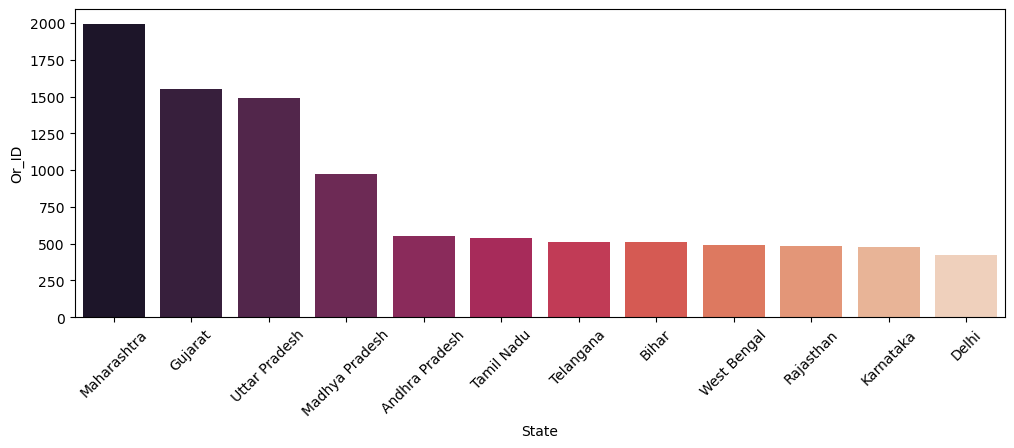

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,4))
sns.barplot(x = gb.index, y = "Or_ID", data = gb, hue = gb.index, palette = "rocket")
plt.xticks(rotation = 45)
plt.show()